# Лабораторная работа №7: Исследование факторов и организация работы с таблицами данных

*Данные*: data_purch.xlsx

### Загрузка пакетов

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Загрузка и проверка данных

In [25]:
data = pd.read_excel('data_purch.xlsx')

In [26]:
# Вывод первых 5 строк
data.head(5)

,first_pub_date,final_protocol_pub_date,purchase_number,collecting_start_date,collecting_end_date,placing_base_name,cust_reg,lot_price_correct,drug_mnn_ext_code,drug_mnn_name,...,drug_position_price,ftg,is_abnd,is_znvlp,is_narcotic,is_msp_purchase,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct
0,2021-03-30,2021-04-12,AA0000001,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,56040.00,5d6d137c-75b7-11ea-b5ac-1b70cb6e9621,ИНТЕРФЕРОН АЛЬФА-2B,...,56040.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
1,2021-03-30,2021-04-12,AB0000002,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,57720.00,5d6e26f4-75b7-11ea-b5ac-3b4e2912a2c3,ИНТЕРФЕРОН АЛЬФА-2B,...,57720.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
2,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb1f40-bf5b-11e9-bd5d-c33c05f32457,БУДЕСОНИД,...,33096.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
3,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb3a20-bf5b-11e9-bd5d-07a90f4fd9f6,БУДЕСОНИД+ФОРМОТЕРОЛ,...,225828.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
4,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb168a-bf5b-11e9-bd5d-5725ca76550a,МОКСОНИДИН,...,10123.68,Препараты гипотензивные,0,1,0,0,0,0,0.0,0.0


In [27]:
# Вывод типов данных
data.dtypes

first_pub_date                 datetime64[ns]
final_protocol_pub_date        datetime64[ns]
purchase_number                        object
collecting_start_date          datetime64[ns]
collecting_end_date            datetime64[ns]
placing_base_name                      object
cust_reg                               object
lot_price_correct                     float64
drug_mnn_ext_code                      object
drug_mnn_name                          object
drug_qty                              float64
drug_price                            float64
drug_position_price                   float64
ftg                                    object
is_abnd                                 int64
is_znvlp                                int64
is_narcotic                             int64
is_msp_purchase                         int64
is_povt                                 int64
is_dif                                  int64
app_amount_absolute_correct           float64
advance_sum_correct               

In [28]:
# Проверка на пропуски
data.isnull().any()

first_pub_date                 False
final_protocol_pub_date        False
purchase_number                False
collecting_start_date          False
collecting_end_date            False
placing_base_name              False
cust_reg                       False
lot_price_correct              False
drug_mnn_ext_code              False
drug_mnn_name                  False
drug_qty                        True
drug_price                     False
drug_position_price             True
ftg                            False
is_abnd                        False
is_znvlp                       False
is_narcotic                    False
is_msp_purchase                False
is_povt                        False
is_dif                         False
app_amount_absolute_correct    False
advance_sum_correct            False
dtype: bool

In [29]:
# Вывод первых 5 строк, где столбец drug_qty пустой
data[data['drug_qty'].isnull()].head(5)

,first_pub_date,final_protocol_pub_date,purchase_number,collecting_start_date,collecting_end_date,placing_base_name,cust_reg,lot_price_correct,drug_mnn_ext_code,drug_mnn_name,...,drug_position_price,ftg,is_abnd,is_znvlp,is_narcotic,is_msp_purchase,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct
21291,2021-02-26,2021-03-09,AB0004127,2021-02-26,2021-03-09,Запрос котировок в электронной форме,Республика Бурятия,499000.0,1edbb2ac-bf5b-11e9-bd5d-537882915649,ЛИЗАТОВ БАКТЕРИЙ СМЕСЬ [STREPTOCOCCUS PNEUMONI...,...,NaN,Препараты для лечения заболеваний органов дыха...,0,0,0,0,0,0,0.0,0.0
21292,2021-02-26,2021-03-09,AB0004127,2021-02-26,2021-03-09,Запрос котировок в электронной форме,Республика Бурятия,499000.0,1ee2fe72-bf5b-11e9-bd5d-fbae22d8843d,АНТИТЕЛА К ГАММА-ИНТЕРФЕРОНУ ЧЕЛОВЕКА,...,NaN,Препараты противовирусные для системного приме...,0,0,0,0,0,0,0.0,0.0
21293,2021-02-26,2021-03-09,AB0004127,2021-02-26,2021-03-09,Запрос котировок в электронной форме,Республика Бурятия,499000.0,1ee62390-bf5b-11e9-bd5d-6f69d0950a26,ИНТЕРФЕРОН АЛЬФА-2B+ТАУРИН,...,NaN,Иммуномодуляторы,0,0,0,0,0,0,0.0,0.0
21294,2021-02-26,2021-03-09,AB0004127,2021-02-26,2021-03-09,Запрос котировок в электронной форме,Республика Бурятия,499000.0,5d6d137c-75b7-11ea-b5ac-1b70cb6e9621,ИНТЕРФЕРОН АЛЬФА-2B,...,NaN,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
21295,2021-02-26,2021-03-09,AB0004127,2021-02-26,2021-03-09,Запрос котировок в электронной форме,Республика Бурятия,499000.0,5d6e26f4-75b7-11ea-b5ac-3b4e2912a2c3,ИНТЕРФЕРОН АЛЬФА-2B,...,NaN,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0


In [30]:
# Количество строк, где advance_sum_correct > 0
data[data['advance_sum_correct'] > 0].shape[0]

1

In [31]:
# Количество строк, где app_amount_absolute_correct > 0
data[data['app_amount_absolute_correct'] > 0].shape[0]

183821

In [32]:
# Вывод 5 строк, где app_amount_absolute_correct > 0
data[data['app_amount_absolute_correct'] > 0].head(5)

,first_pub_date,final_protocol_pub_date,purchase_number,collecting_start_date,collecting_end_date,placing_base_name,cust_reg,lot_price_correct,drug_mnn_ext_code,drug_mnn_name,...,drug_position_price,ftg,is_abnd,is_znvlp,is_narcotic,is_msp_purchase,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct
254,2021-12-30,2022-01-17,AB0000022,2021-12-30,2022-01-14,Электронный аукцион,Республика Адыгея,1881359.9,1ed990f8-bf5b-11e9-bd5d-4fcd3aeab216,ЭТАНОЛ,...,36000.0,Антисептики и дезинфицирующие препараты,1,1,0,0,0,0,18813.6,0.0
255,2021-12-30,2022-01-17,AB0000022,2021-12-30,2022-01-14,Электронный аукцион,Республика Адыгея,1881359.9,1ed990f8-bf5b-11e9-bd5d-4fcd3aeab216,ЭТАНОЛ,...,30960.0,Антисептики и дезинфицирующие препараты,1,1,0,0,0,0,18813.6,0.0
256,2021-12-30,2022-01-17,AB0000022,2021-12-30,2022-01-14,Электронный аукцион,Республика Адыгея,1881359.9,1ed990f8-bf5b-11e9-bd5d-4fcd3aeab216,ЭТАНОЛ,...,61600.0,Антисептики и дезинфицирующие препараты,1,1,0,0,0,0,18813.6,0.0
257,2021-12-30,2022-01-17,AB0000022,2021-12-30,2022-01-14,Электронный аукцион,Республика Адыгея,1881359.9,1ed990f8-bf5b-11e9-bd5d-4fcd3aeab216,ЭТАНОЛ,...,61600.0,Антисептики и дезинфицирующие препараты,1,1,0,0,0,0,18813.6,0.0
258,2021-12-30,2022-01-17,AB0000022,2021-12-30,2022-01-14,Электронный аукцион,Республика Адыгея,1881359.9,1ed990f8-bf5b-11e9-bd5d-4fcd3aeab216,ЭТАНОЛ,...,49500.0,Антисептики и дезинфицирующие препараты,1,1,0,0,0,0,18813.6,0.0


Можно было бы взять фактор `advance_sum_correct` к рассмотрению, но в данных всего 1 запись с ненулевым значением

### Группировка и исследование необходимых переменных

- `placing_base_name`: форма проведения торгов. Разные формы проведения торгов могут иметь разную степень конкуренции и прозрачности, а также обязательства
- `lot_price_correct`: если максимально возможная цена слишком низкая, то поставщики могут не заинтересоваться участием в закупке.
- `drug_qty`: большие объемы закупок могут привлекать больше поставщиков и увеличивать конкуренцию
- `drug_position_price`: аналогично `lot_price_correct`
- `is_abnd`: целевая переменная, которая указывает на то, состоялась ли закупка или нет
- `is_znvlp`: закупки препаратов из списка ЖВЛП могут регулироваться более строго и иметь больше требований к поставщикам
- `is_povt`: если процедуру заказчик вынужден повторить, это может указывать на проблемы с предыдущей попыткой проведения закупки, допустим, не смог найти поставщика
- `is_dif`: закупка дефицитных препаратов может быть более сложной из-за ограниченного количества поставщиков и доступности препаратов
- `app_amount_absolute_correct`: большие суммы залога могут быть барьером для участия некоторых поставщиков в закупке

In [33]:
# Группировка данных по purchase_number
grouped_data = data.groupby('purchase_number').agg({
    'placing_base_name': 'first',
    'lot_price_correct': 'first',
    'drug_qty': 'sum',
    'drug_position_price': 'sum',
    'is_abnd': 'first',
    'is_znvlp': 'first',
    'is_povt': 'first',
    'is_dif': 'first',
    'app_amount_absolute_correct': 'first',
})

# Обновление индекса
grouped_data.reset_index(inplace=True)

In [34]:
# Удаление столбца purchase_number
grouped_data.drop('purchase_number', axis=1, inplace=True)

### Формирование новых факторов

In [35]:
# Вывод уникальных значений столбца placing_base_name
grouped_data['placing_base_name'].unique()

array(['Электронный аукцион', 'Запрос котировок в электронной форме',
       'Запрос предложений в электронной форме', 'Запрос котировок'],
      dtype=object)

In [36]:
# Преобразование категориальной переменной
# One-hot encoding переменной placing_base_name
grouped_data = pd.get_dummies(grouped_data, columns=['placing_base_name'])

In [37]:
# Словарь с новыми именами столбцов
new_column_names = {
    'placing_base_name_Электронный аукцион': 'placing_base_name_el_auction',
    'placing_base_name_Запрос котировок в электронной форме': 'placing_base_name_req_quotations_el',
    'placing_base_name_Запрос предложений в электронной форме': 'placing_base_name_req_propasals_el',
    'placing_base_name_Запрос котировок': 'placing_base_name_req_quotations'
}

# Изменение имен столбцов
grouped_data = grouped_data.rename(columns=new_column_names)

In [38]:
# Вывод первых 5 строк
grouped_data.head(5)

,lot_price_correct,drug_qty,drug_position_price,is_abnd,is_znvlp,is_povt,is_dif,app_amount_absolute_correct,placing_base_name_req_quotations,placing_base_name_req_quotations_el,placing_base_name_req_propasals_el,placing_base_name_el_auction
0,56040.00,2000.0,56040.00,0,1,0,0,0.0,0,0,0,1
1,383087.00,5832558.0,383087.00,0,1,0,0,0.0,0,0,0,1
2,185868.25,53560.1,185868.25,1,1,0,0,0.0,0,0,0,1
3,162944.70,192980.0,162944.70,0,1,0,0,0.0,0,0,0,1
4,130772.34,6300.0,130772.34,0,1,0,0,0.0,0,0,0,1


In [39]:
# # Стандартизация данных
# scaler = StandardScaler()
# grouped_data = scaler.fit_transform(grouped_data)

# Метод главных компонент по 1 компоненте
pca = PCA(n_components=1)
new_feature = pca.fit_transform(grouped_data)
grouped_data['PCA'] = new_feature

# Вычисление корреляционной матрицы
corr_matrix = np.corrcoef(grouped_data, rowvar=False)

# Вычисление собственных значений корреляционной матрицы
eigenvalues = np.linalg.eigvals(corr_matrix)

# Определение оптимального количества компонент
n_components = np.sum(eigenvalues > 1)

# Факторный анализ с оптимальным количеством компонент
fa = FactorAnalysis(n_components=n_components)
fa.fit(grouped_data)
transformed_data = fa.transform(grouped_data)

# Добавление нового фактора к исходным данным
grouped_data['FA'] = transformed_data[:, 0]

- `app_amount_ratio`: отношение суммы залога к максимально возможной цене за все лекарства в закупке
- `is_high_value`: бинарный фактор, который устанавливается в 1, если `lot_price_correct` выше 75-го процентиля всех значений в этом столбце, и 0 в противном случае. Он будет указывать на то, является ли закупка высокоценной партией
- `is_large_qty`: бинарный фактор, который устанавливается в 1, если `drug_qty` выше 75-го процентиля всех значений в этом столбце, и 0 в противном случае. Он будет указывать на то, является ли закупка большим количеством лекарств

In [40]:
grouped_data['app_amount_ratio'] = grouped_data['app_amount_absolute_correct'] / grouped_data['lot_price_correct']
grouped_data['is_high_value'] = np.where(grouped_data['lot_price_correct'] > grouped_data['lot_price_correct'].quantile(0.75), 1, 0)
grouped_data['is_large_qty'] = np.where(grouped_data['drug_qty'] > grouped_data['drug_qty'].quantile(0.75), 1, 0)

### Разделение на обучающую и тестовую выборку

In [41]:
# Выделение случайной выборки размера n
n = 57000
sample = grouped_data.sample(n)

# Разделение выборки на обучающую и тестовую
test_size = 0.15
train, test = train_test_split(sample, test_size=test_size)

# Разделение выборки на признаки и целевую переменную
X_train, X_test = train.drop('is_abnd', axis=1), test.drop('is_abnd', axis=1)
y_train, y_test = train['is_abnd'], test['is_abnd']

In [42]:
# Количество объектов в обучающей выборке
X_train.shape[0]

48450

### Оценка важности факторов на основе метода "Дерево решений" 

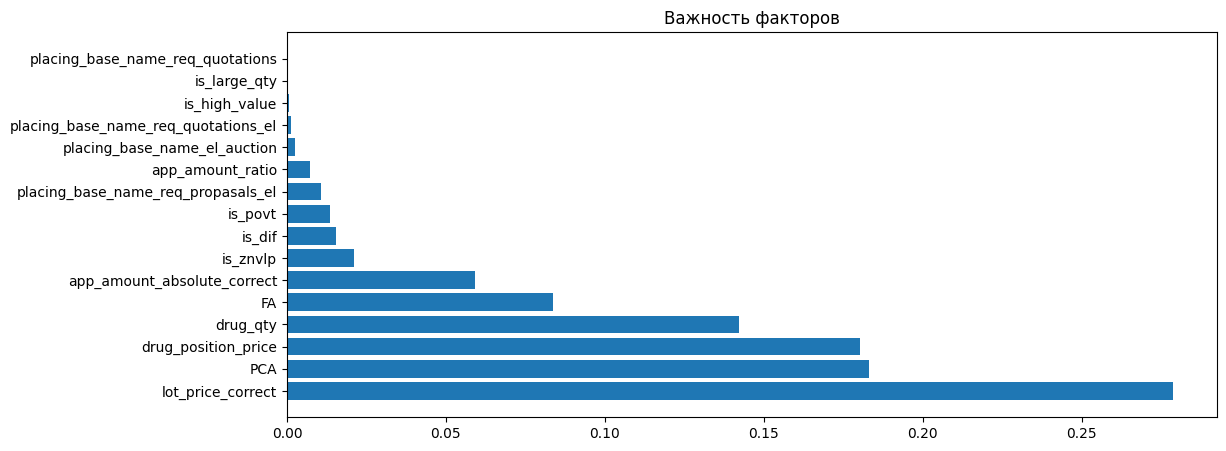

5 важных фактора: ['lot_price_correct', 'PCA', 'drug_position_price', 'drug_qty', 'FA']


In [43]:
# Создание "Дерево решений" и её обучение
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Получение важности факторов
importances = dt.feature_importances_

# Сохранение важности факторов в датафрейм и сортировка по убыванию
df_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values('importance', ascending=False)

# Построение графика важности факторов
plt.figure(figsize=(12,5))
plt.barh(df_importances['feature'], df_importances['importance'])
plt.title('Важность факторов')
plt.show()

# Вывод 5 наиболее важных факторов
top_factors = df_importances.head(5)['feature'].values.tolist()
print("5 важных факторов:", top_factors)

### Построение логистической регрессии

In [44]:
# Выбор только 5 наиболее важных факторов в обучающей и тестовой выборке
X_train = X_train[top_factors]
X_test = X_test[top_factors]

In [45]:
# Создание модели логистической регрессии и её обучение
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Предсказание на обучающей и тестовой выборках
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Оценка точности на обучающей и тестовой выборках
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Вывод точности модели на обучающей и тестовой выборках
print("Точность модели на обучающей выборке:", train_accuracy)
print("Точность модели на тестовой выборке:", test_accuracy)

Точность модели на обучающей выборке: 0.5090608875128999
Точность модели на тестовой выборке: 0.5050292397660818


Точность около 0.5 означает, что модель правильно соотносит 50% объектов. Это равносильно случайному угадыванию. Таким образом, точность является низкой и указывает на то, что модель не может надежно предсказывать целевую переменную, поэтому данные факторы и модель не особо могут быть пригодными для использования